In [1]:
!pip install openpyxl==3.0.10

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
from openpyxl import load_workbook
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt #visualisasi algortima

In [3]:
#Melakukan load data
df = pd.read_csv(r'DaftarSaham.csv')
df

,Code,Name,ListingDate,Shares,ListingBoard,Sector,LastPrice,MarketCap,MinutesFirstAdded,MinutesLastUpdated,HourlyFirstAdded,HourlyLastUpdated,DailyFirstAdded,DailyLastUpdated
0,AALI,Astra Agro Lestari Tbk.,1997-12-09,1.924688e+09,Utama,Consumer Non-Cyclicals,7950.0,1.530127e+13,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2001-04-16,2022-12-19
1,ABBA,Mahaka Media Tbk.,2002-04-03,3.935893e+09,Pengembangan,Consumer Cyclicals,160.0,6.297429e+11,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2002-04-03,2022-12-19
2,ABDA,Asuransi Bina Dana Arta Tbk.,1989-07-06,6.208067e+08,Pengembangan,Financials,6700.0,4.159405e+12,2021-11-01 09:00:00,2022-11-11 15:59:00,2020-04-16 09:00:00,2022-11-11 16:00:00,2001-04-16,2022-12-16
3,ABMM,ABM Investama Tbk.,2011-12-06,2.753165e+09,Utama,Industrials,3540.0,9.746204e+12,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2011-12-06,2022-12-19
4,ACES,Ace Hardware Indonesia Tbk.,2007-11-06,1.715000e+10,Utama,Consumer Cyclicals,420.0,7.203000e+12,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2007-11-06,2022-12-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,ZATA,Bersama Zatta Jaya Tbk.,2022-11-10 00:00:00,8.496000e+09,Utama,Consumer Cyclicals,131.0,1.112976e+12,2022-11-10 09:00:00,2022-12-19 15:59:00,2022-11-10 09:00:00,2022-12-19 15:00:00,2022-11-11,2022-12-19
821,ZBRA,Dosni Roha Indonesia Tbk.,1991-08-01,2.510706e+09,Pengembangan,Industrials,540.0,1.355781e+12,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2001-04-16,2022-12-19
822,ZINC,Kapuas Prima Coal Tbk.,2017-10-16,2.525000e+10,Pengembangan,Basic Materials,50.0,1.262500e+12,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2017-10-16,2022-12-19
823,ZONE,Mega Perintis Tbk.,2018-12-12,8.701715e+08,Pengembangan,Consumer Cyclicals,1235.0,1.074662e+12,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2018-12-12,2022-12-19


In [4]:
#Mengubah nama kolom
df.columns =['CODE', 'NAMA', 'TANGGAL_DAFTAR', 'SAHAM', 'PERDAGANGAN', 'SEKTOR', 'HARGA_AKHIR', 'KAPITALISASI_PASAR', 'MENITPERTAMADITAMBAHKAN', 'MENITAKHIRDIPERBARUI', 'PERJAMPERTAMADITAMBAHKAN', 'PERJAMTERAKHIRDIPERBARUI', 'HARIPERTAMADITAMBAKAHKAN', 'HARIPERTAMADIPERNARUI']
df

,CODE,NAMA,TANGGAL_DAFTAR,SAHAM,PERDAGANGAN,SEKTOR,HARGA_AKHIR,KAPITALISASI_PASAR,MENITPERTAMADITAMBAHKAN,MENITAKHIRDIPERBARUI,PERJAMPERTAMADITAMBAHKAN,PERJAMTERAKHIRDIPERBARUI,HARIPERTAMADITAMBAKAHKAN,HARIPERTAMADIPERNARUI
0,AALI,Astra Agro Lestari Tbk.,1997-12-09,1.924688e+09,Utama,Consumer Non-Cyclicals,7950.0,1.530127e+13,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2001-04-16,2022-12-19
1,ABBA,Mahaka Media Tbk.,2002-04-03,3.935893e+09,Pengembangan,Consumer Cyclicals,160.0,6.297429e+11,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2002-04-03,2022-12-19
2,ABDA,Asuransi Bina Dana Arta Tbk.,1989-07-06,6.208067e+08,Pengembangan,Financials,6700.0,4.159405e+12,2021-11-01 09:00:00,2022-11-11 15:59:00,2020-04-16 09:00:00,2022-11-11 16:00:00,2001-04-16,2022-12-16
3,ABMM,ABM Investama Tbk.,2011-12-06,2.753165e+09,Utama,Industrials,3540.0,9.746204e+12,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2011-12-06,2022-12-19
4,ACES,Ace Hardware Indonesia Tbk.,2007-11-06,1.715000e+10,Utama,Consumer Cyclicals,420.0,7.203000e+12,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2007-11-06,2022-12-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,ZATA,Bersama Zatta Jaya Tbk.,2022-11-10 00:00:00,8.496000e+09,Utama,Consumer Cyclicals,131.0,1.112976e+12,2022-11-10 09:00:00,2022-12-19 15:59:00,2022-11-10 09:00:00,2022-12-19 15:00:00,2022-11-11,2022-12-19
821,ZBRA,Dosni Roha Indonesia Tbk.,1991-08-01,2.510706e+09,Pengembangan,Industrials,540.0,1.355781e+12,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2001-04-16,2022-12-19
822,ZINC,Kapuas Prima Coal Tbk.,2017-10-16,2.525000e+10,Pengembangan,Basic Materials,50.0,1.262500e+12,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2017-10-16,2022-12-19
823,ZONE,Mega Perintis Tbk.,2018-12-12,8.701715e+08,Pengembangan,Consumer Cyclicals,1235.0,1.074662e+12,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2018-12-12,2022-12-19


In [5]:
#mengecek data kosong
df.dropna(inplace=True)

In [26]:
data = df.drop(['NAMA', 'CODE','TANGGAL_DAFTAR','KAPITALISASI_PASAR', 'MENITPERTAMADITAMBAHKAN', 'MENITAKHIRDIPERBARUI', 'PERJAMPERTAMADITAMBAHKAN', 'PERJAMTERAKHIRDIPERBARUI', 'HARIPERTAMADITAMBAKAHKAN', 'HARIPERTAMADIPERNARUI'], axis=1, inplace=False)
data.reset_index().drop('index', axis='columns')
data

,SAHAM,PERDAGANGAN,SEKTOR,HARGA_AKHIR,label,KODE CODE,KODE SEKTOR,KODE PERDAGANGAN,KODE NAMA,KODE SAHAM
0,1.924688e+09,Utama,Consumer Non-Cyclicals,7950.0,3,0.0,0.0,1.0,0.0,0.0
1,3.935893e+09,Pengembangan,Consumer Cyclicals,160.0,3,1.0,1.0,0.0,1.0,1.0
2,6.208067e+08,Pengembangan,Financials,6700.0,3,2.0,2.0,0.0,2.0,2.0
3,2.753165e+09,Utama,Industrials,3540.0,3,3.0,3.0,1.0,3.0,3.0
4,1.715000e+10,Utama,Consumer Cyclicals,420.0,3,4.0,1.0,1.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...
820,8.496000e+09,Utama,Consumer Cyclicals,131.0,1,777.0,1.0,1.0,777.0,731.0
821,2.510706e+09,Pengembangan,Industrials,540.0,1,778.0,3.0,0.0,778.0,732.0
822,2.525000e+10,Pengembangan,Basic Materials,50.0,1,779.0,6.0,0.0,779.0,733.0
823,8.701715e+08,Pengembangan,Consumer Cyclicals,1235.0,1,780.0,1.0,0.0,780.0,734.0


In [27]:
# normalisasi min-max kolom KODEPOS
from sklearn.preprocessing import MinMaxScaler

data_skaling = data[['HARGA_AKHIR']]

# scale features
scaler = MinMaxScaler()
model = scaler.fit(data_skaling)
data_skaling = model.transform(data_skaling)

data_training = data.copy()
data_training['HARGA_AKHIR'] = data_skaling[: ,0]
data_training

,SAHAM,PERDAGANGAN,SEKTOR,HARGA_AKHIR,label,KODE CODE,KODE SEKTOR,KODE PERDAGANGAN,KODE NAMA,KODE SAHAM
0,1.924688e+09,Utama,Consumer Non-Cyclicals,0.195452,3,0.0,0.0,1.0,0.0,0.0
1,3.935893e+09,Pengembangan,Consumer Cyclicals,0.003934,3,1.0,1.0,0.0,1.0,1.0
2,6.208067e+08,Pengembangan,Financials,0.164720,3,2.0,2.0,0.0,2.0,2.0
3,2.753165e+09,Utama,Industrials,0.087031,3,3.0,3.0,1.0,3.0,3.0
4,1.715000e+10,Utama,Consumer Cyclicals,0.010326,3,4.0,1.0,1.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...
820,8.496000e+09,Utama,Consumer Cyclicals,0.003221,1,777.0,1.0,1.0,777.0,731.0
821,2.510706e+09,Pengembangan,Industrials,0.013276,1,778.0,3.0,0.0,778.0,732.0
822,2.525000e+10,Pengembangan,Basic Materials,0.001229,1,779.0,6.0,0.0,779.0,733.0
823,8.701715e+08,Pengembangan,Consumer Cyclicals,0.030363,1,780.0,1.0,0.0,780.0,734.0


In [28]:
# Melakukan one hot encoding pada kolom bertipe kategorikal
data_training = pd.get_dummies(data_training, columns = ['SAHAM', 'SEKTOR', 'PERDAGANGAN',])
data_training.reset_index().drop('index', axis='columns')
data_training

,HARGA_AKHIR,label,KODE CODE,KODE SEKTOR,KODE PERDAGANGAN,KODE NAMA,KODE SAHAM,SAHAM_3600000.0,SAHAM_70000000.0,SAHAM_96000000.0,...,SEKTOR_Financials,SEKTOR_Healthcare,SEKTOR_Industrials,SEKTOR_Infrastructures,SEKTOR_Properties & Real Estate,SEKTOR_Technology,SEKTOR_Transportation & Logistic,PERDAGANGAN_Akselerasi,PERDAGANGAN_Pengembangan,PERDAGANGAN_Utama
0,0.195452,3,0.0,0.0,1.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.003934,3,1.0,1.0,0.0,1.0,1.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.164720,3,2.0,2.0,0.0,2.0,2.0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0.087031,3,3.0,3.0,1.0,3.0,3.0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.010326,3,4.0,1.0,1.0,4.0,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,0.003221,1,777.0,1.0,1.0,777.0,731.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
821,0.013276,1,778.0,3.0,0.0,778.0,732.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
822,0.001229,1,779.0,6.0,0.0,779.0,733.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
823,0.030363,1,780.0,1.0,0.0,780.0,734.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters = 8)
kmeans.fit(data_training)
kmeans.labels_
silhouette_score(data_training, kmeans.labels_)

0.5295445855857588

In [30]:
df['label'] = kmeans.labels_
df

,CODE,NAMA,TANGGAL_DAFTAR,SAHAM,PERDAGANGAN,SEKTOR,HARGA_AKHIR,KAPITALISASI_PASAR,MENITPERTAMADITAMBAHKAN,MENITAKHIRDIPERBARUI,PERJAMPERTAMADITAMBAHKAN,PERJAMTERAKHIRDIPERBARUI,HARIPERTAMADITAMBAKAHKAN,HARIPERTAMADIPERNARUI,label,KODE CODE,KODE SEKTOR,KODE PERDAGANGAN,KODE NAMA,KODE SAHAM
0,AALI,Astra Agro Lestari Tbk.,1997-12-09,1.924688e+09,Utama,Consumer Non-Cyclicals,7950.0,1.530127e+13,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2001-04-16,2022-12-19,7,0.0,0.0,1.0,0.0,0.0
1,ABBA,Mahaka Media Tbk.,2002-04-03,3.935893e+09,Pengembangan,Consumer Cyclicals,160.0,6.297429e+11,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2002-04-03,2022-12-19,7,1.0,1.0,0.0,1.0,1.0
2,ABDA,Asuransi Bina Dana Arta Tbk.,1989-07-06,6.208067e+08,Pengembangan,Financials,6700.0,4.159405e+12,2021-11-01 09:00:00,2022-11-11 15:59:00,2020-04-16 09:00:00,2022-11-11 16:00:00,2001-04-16,2022-12-16,7,2.0,2.0,0.0,2.0,2.0
3,ABMM,ABM Investama Tbk.,2011-12-06,2.753165e+09,Utama,Industrials,3540.0,9.746204e+12,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2011-12-06,2022-12-19,7,3.0,3.0,1.0,3.0,3.0
4,ACES,Ace Hardware Indonesia Tbk.,2007-11-06,1.715000e+10,Utama,Consumer Cyclicals,420.0,7.203000e+12,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2007-11-06,2022-12-19,7,4.0,1.0,1.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,ZATA,Bersama Zatta Jaya Tbk.,2022-11-10 00:00:00,8.496000e+09,Utama,Consumer Cyclicals,131.0,1.112976e+12,2022-11-10 09:00:00,2022-12-19 15:59:00,2022-11-10 09:00:00,2022-12-19 15:00:00,2022-11-11,2022-12-19,3,777.0,1.0,1.0,777.0,731.0
821,ZBRA,Dosni Roha Indonesia Tbk.,1991-08-01,2.510706e+09,Pengembangan,Industrials,540.0,1.355781e+12,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2001-04-16,2022-12-19,3,778.0,3.0,0.0,778.0,732.0
822,ZINC,Kapuas Prima Coal Tbk.,2017-10-16,2.525000e+10,Pengembangan,Basic Materials,50.0,1.262500e+12,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2017-10-16,2022-12-19,3,779.0,6.0,0.0,779.0,733.0
823,ZONE,Mega Perintis Tbk.,2018-12-12,8.701715e+08,Pengembangan,Consumer Cyclicals,1235.0,1.074662e+12,2021-11-01 09:00:00,2022-12-19 15:59:00,2020-04-16 09:00:00,2022-12-19 15:00:00,2018-12-12,2022-12-19,3,780.0,1.0,0.0,780.0,734.0


Text(0.5, 0, 'HARGA_AKHIR')

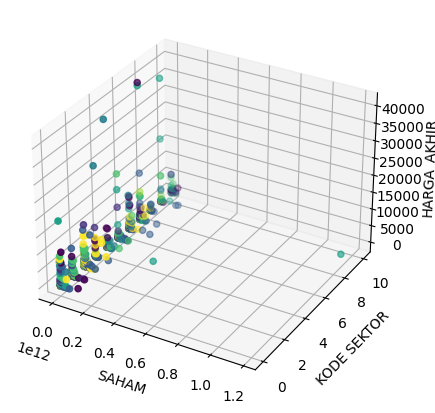

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

data_saham = pd.factorize(df['SAHAM'].unique())
data_sektor = pd.factorize(df['SEKTOR'].unique())
data_perdagangan = pd.factorize(df['PERDAGANGAN'].unique())

kode_saham = {}
kode_sektor = {}
kode_perdagangan = {}

for i in range(len(data_saham[0])):
    saham = data_saham[1][i]
    kode = data_saham[0][i]
    kode_saham[saham] = kode

for i in range(len(data_sektor[0])):
    saham = data_sektor[1][i]
    kode = data_sektor[0][i]
    kode_sektor[saham] = kode

# for i in range(len(data_skala_usaha[0])):
#     saham = data_skala_usaha[1][i]
#     kode = data_skala_usaha[0][i]
#     kode_skala_usaha[saham] = kode

kode_perdagangan = {'Pengembangan' : 0, 'Akselerasi' : 2, 'Utama' : 1}

for index, row in df.iterrows():
    df.loc[index, 'KODE SAHAM'] = kode_saham[row['SAHAM']]
    df.loc[index, 'KODE SEKTOR'] = kode_sektor[row['SEKTOR']]
    df.loc[index, 'KODE PERDAGANGAN'] = kode_perdagangan[row['PERDAGANGAN']]

x = df['SAHAM']
y = df['KODE SEKTOR']
z = df['HARGA_AKHIR']

fig = plt.figure(figsize=(10, 5))
# Create 3D container
ax = plt.axes(projection = '3d')
# Visualize 3D scatter plot
ax.scatter3D(x, y, z, c=kmeans.labels_, marker='o')
# Give labels
ax.set_xlabel('SAHAM')
ax.set_ylabel('KODE SEKTOR')
ax.set_zlabel('HARGA_AKHIR')
# # Save figure
# plt.savefig('3d_scatter.png', dpi = 500);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ef605a5d-7caf-4956-b8b2-0b660b302cf4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>